In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
import tensorflow as tf
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import ReLU
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [2]:
dirname = os.path.join(os.getcwd(), 'objects')  #We import the images from our directory
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("Reading imagenes from ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Reading..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directories read:',len(directories))
print("Images in each directory", dircount)
print('Total image:',sum(dircount))

Reading imagenes from  C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\objects\objects\
C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\objects\objects\cell_phone 1
C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\objects\objects\headphones 1261
C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\objects\objects\keys 608
C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\objects\objects\passport 102
C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\objects\objects\wallet 473
Directories read: 5
Images in each directory [1262, 608, 102, 473, 1862]
Total image: 4307


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Labels created: ",len(labels))
 
objects=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    objects.append(name[len(name)-1])
    indice=indice+1

#img_resized = images.resize((64,64))
    
y = np.array(labels,dtype=np.uint8)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Labels created:  4307
0 cell_phone
1 headphones
2 keys
3 passport
4 wallet
Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [4]:
#train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2) #data split
X_train,X_test,Y_train_n,Y_test_n= train_test_split(X,y,test_size=0.25)
print('Training data shape : ', X_train.shape, Y_train_n.shape)
print('Testing data shape : ', X_test.shape, Y_test_n.shape)

Training data shape :  (3230, 64, 64, 3) (3230,)
Testing data shape :  (1077, 64, 64, 3) (1077,)


In [5]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
X_train = X_train / 255.  #normalization
X_test = X_test / 255.
print('Original label:', Y_train_n[3]) 
# Change the labels from categorical to one-hot encoding
Y_train = to_categorical(Y_train_n)
Y_test = to_categorical(Y_test_n)
 
# Display the change for category label using one-hot encoding

print('After conversion to one-hot:', Y_train[3])
 
#train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
#print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


In [6]:
Y_train

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [7]:
INIT_LR = 1e-3  #Model definition
epochs = 30 #20
batch_size = 10
 
object_model = Sequential()
object_model.add(Conv2D(32, kernel_size=(3, 3),activation='LeakyReLU',padding='same',input_shape=(64,64,3)))
#object_model.add(LeakyReLU(alpha=0.1))
object_model.add(MaxPooling2D((2, 2),padding='same'))
object_model.add(Dropout(0.60)) #0.50
#object_model.add(Conv2D(64, kernel_size=(3, 3),activation='LeakyReLU',padding='same'))
#object_model.add(MaxPooling2D((2, 2),padding='same'))
#object_model.add(Dropout(0.60)) #0.50
 
object_model.add(Flatten())
object_model.add(Dense(32, activation='LeakyReLU'))
#object_model.add(LeakyReLU(alpha=0.1))
object_model.add(Dropout(0.60)) 
object_model.add(Dense(nClasses, activation='softmax'))
 
object_model.summary()
 
#object_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
object_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adamax') #Adagrad SGD Adam

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1048608   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [8]:

object_train_dropout = object_model.fit(X_train, Y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
 
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
#object_model.save("object_model.h5py")

Epoch 1/30
323/323 [==============================] - 8s 23ms/step - loss: 1.3296 - accuracy: 0.5161 - val_loss: 0.9841 - val_accuracy: 0.6518
Epoch 2/30
323/323 [==============================] - 9s 27ms/step - loss: 1.0467 - accuracy: 0.6074 - val_loss: 0.8892 - val_accuracy: 0.6797
Epoch 3/30
323/323 [==============================] - 7s 23ms/step - loss: 0.9481 - accuracy: 0.6539 - val_loss: 0.8807 - val_accuracy: 0.6778
Epoch 4/30
323/323 [==============================] - 8s 25ms/step - loss: 0.8823 - accuracy: 0.6836 - val_loss: 0.8229 - val_accuracy: 0.6964
Epoch 5/30
323/323 [==============================] - 7s 21ms/step - loss: 0.8371 - accuracy: 0.7009 - val_loss: 0.7857 - val_accuracy: 0.7140
Epoch 6/30
323/323 [==============================] - 7s 21ms/step - loss: 0.8053 - accuracy: 0.7080 - val_loss: 0.7879 - val_accuracy: 0.7066
Epoch 7/30
323/323 [==============================] - 7s 21ms/step - loss: 0.7635 - accuracy: 0.7211 - val_loss: 0.8528 - val_accuracy: 0.6787

In [9]:

test_eval = object_model.evaluate(X_test, Y_test, verbose=2)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


34/34 - 0s - loss: 0.7799 - accuracy: 0.7567 - 457ms/epoch - 13ms/step
Test loss: 0.7798861265182495
Test accuracy: 0.7567316889762878


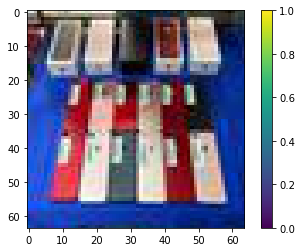

In [32]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
probability_model = tf.keras.Sequential([object_model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(X_test)
predictions[1]

array([0.14941004, 0.40225264, 0.14916684, 0.14915316, 0.1500173 ],
      dtype=float32)

In [13]:
np.argmax(predictions[7])

0

In [14]:
#Y_test = to_categorical(Y_test)

In [15]:
Y_test[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [16]:
class_names = ['cell_phone', 'headphones', 'keys', 'passport', 'wallet']


In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                #np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

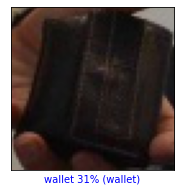

In [18]:
i = 0
plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test_n, X_test)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  Y_test)
plt.show()

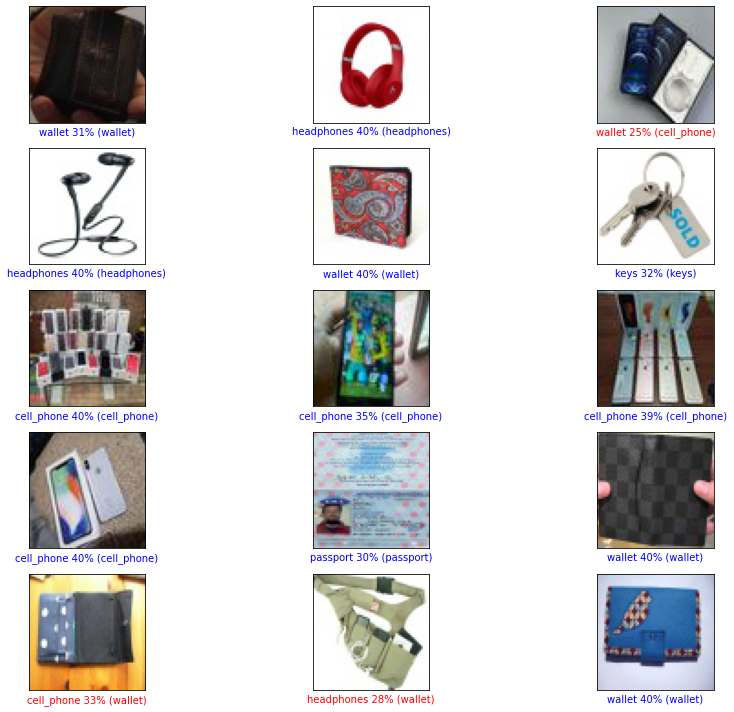

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test_n, X_test)
  #plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

In [20]:
#Make predictions
y_probs = object_model.predict(X_test)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

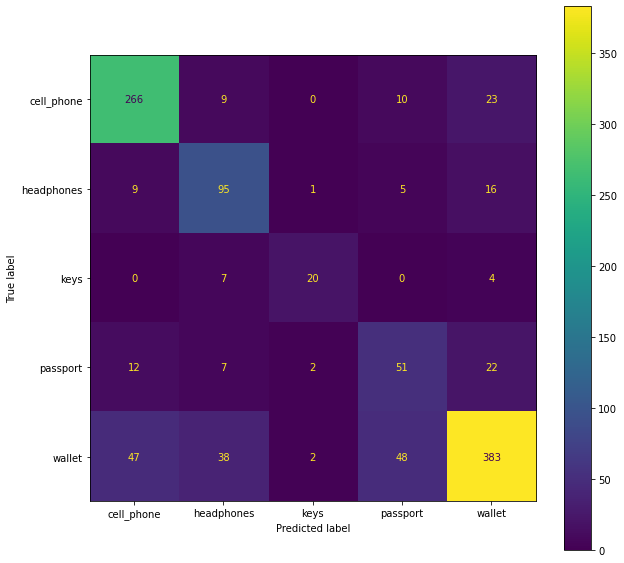

In [21]:
#Confusion matrix
cm=confusion_matrix(y_preds,Y_test_n)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_preds,Y_test_n)

# Call a method heatmap() to plot confusion matrix
#sns.heatmap(cm, annot = True)
#plt.title("Confusion_matrix GaussianNB")
# print the classification_report based on y_test and y_predict
print(classification_report(y_preds,Y_test_n))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       308
           1       0.61      0.75      0.67       126
           2       0.80      0.65      0.71        31
           3       0.45      0.54      0.49        94
           4       0.85      0.74      0.79       518

    accuracy                           0.76      1077
   macro avg       0.70      0.71      0.70      1077
weighted avg       0.77      0.76      0.76      1077



# RESIZE IMAGEN

CODE USE TO RESIZE BULK IMAGES FROM 244X44 TO 64X64


In [23]:
#import PIL
#import os
#import os.path
#from PIL import Image

#img_dir = r'C:\Users\fenix\Documents\MASTER IN DATA ANALYTICS\SEMESTER_2\CA1\Photos\cellphone'

#print('Bulk images resizing started...')

#for img in os.listdir(img_dir):
    #f_img = img_dir + img
    #f, e = os.path.splitext(img_dir + img)
    #img = Image.open(f_img)
    #img = img.resize((1200, 628))
    #img.save(f + '_resized.jpg')

#print('Bulk images resizing finished...')    

# KEEP ARRAY IN A CSV.

The data was kept in a dataframe to store the images in hadoop.

In [24]:
#x = X.reshape(4307,12288) #reshape 4d array to 2d in order to keep images in CSV and store in HADOOP


In [25]:
#img_df = pd.DataFrame.from_records(x)
    #df = pd.DataFrame.from_records(y)
#df = pd.DataFrame(y)
#df.to_csv(r'C:\Users\fenix\labels.csv', index=False)
#img_df.to_csv(r'C:\Users\fenix\DATA.csv', index=False)


In [26]:
img_df=pd.read_csv('DATA.csv')
#labels_df=pd.read_csv('labels.csv')
img_df.head()


,0,1,2,3,4,5,6,7,8,9,...,12911,12912,12913,12914,12915,12916,12917,12918,12919,12920
0,35,20,25,48,35,42,84,73,81,151,...,242,229,232,241,228,231,240,227,230,239
1,227,230,239,225,228,237,225,228,237,224,...,162,119,131,127,93,108,103,171,187,184
2,145,161,158,133,149,146,142,158,155,145,...,163,197,190,164,195,188,160,193,186,158
3,202,195,167,197,190,162,203,196,170,199,...,147,146,151,147,148,153,149,149,154,150
4,150,155,151,150,155,151,150,155,151,149,...,172,181,195,172,179,193,170,177,191,168


In [27]:
img_df=img_df.to_numpy()
#labels_df=labels_df.to_numpy()

In [28]:
newarr = img_df.reshape(4307,64,64,3)
newarr.shape

(4307, 64, 64, 3)

In [29]:
#newarr[4306] #VALIDATION OF THE ARRAY KEEP IMAGEN INFORMATION

In [30]:
#X[4306]

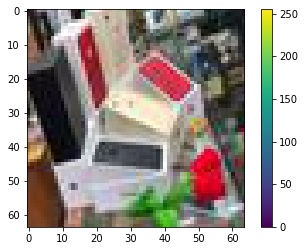

In [31]:
plt.figure()    #VALIDATION OF THE ARRAY KEEP IMAGEN INFORMATION
plt.imshow(newarr[0])
plt.colorbar()
plt.grid(False)
plt.show()